**DATASET DESCRIPTION**
*   world_rank - world rank for the university
*   university_name - name of university
*   country - country of each university
*   teaching - university score for teaching (the learning environment)
*   international - university score international outlook (staff, students, research)
*   research - university score for research (volume, income and reputation)
*   citations - university score for citations (research influence)
*   income - university score for industry income (knowledge transfer)
*   total_score - total score for university, used to determine rank
*   num_students - number of students at the university
*   student_staff_ratio - number of students divided by number of staff
*   international_students - percentage of students who are international
*   female_male_ratio - Female student to Male student ratio
*   year - year of the ranking

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("timesData.csv")

In [3]:
df.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [5]:
df.shape

(2603, 14)

In [6]:
# Сhange data types
df['international'] = df.international.apply(lambda x: float(str(x).replace('-', 'nan')))
df['income'] = df.income.apply(lambda x: float(str(x).replace('-', 'nan')))
df['total_score'] = df.total_score.apply(lambda x: float(str(x).replace('-', 'nan')))
df['num_students'] = df.num_students.apply(lambda x: int(float(str(x).replace(',', '').replace('nan', '0'))))
df['international_students'] = df.international_students.apply(lambda x: float(str(x).replace('%', '')))

# Find female and male students
df['female'] = df.female_male_ratio.apply(lambda x: float(str(x).split(':')[0].strip().replace('-', 'nan')))
df['male'] = df.female_male_ratio.apply(lambda x: float(str(x).split(':')[-1].strip().replace('-', 'nan')))

In [7]:
df.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,female,male
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152,8.9,25.0,NaN,2011,NaN,NaN
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243,6.9,27.0,33 : 67,2011,33.0,67.0
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074,9.0,33.0,37 : 63,2011,37.0,63.0
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596,7.8,22.0,42 : 58,2011,42.0,58.0
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,NaN,94.2,7929,8.4,27.0,45 : 55,2011,45.0,55.0


In [8]:
df.shape

(2603, 16)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2594 non-null   float64
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2385 non-null   float64
 8   total_score             1201 non-null   float64
 9   num_students            2603 non-null   int64  
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   float64
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
 14  female                  2367 non-null   

In [10]:
df.describe()

,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,year,female,male
count,2603.000000,2594.000000,2603.000000,2603.000000,2385.000000,1201.000000,2603.000000,2544.000000,2536.000000,2603.000000,2367.000000,2367.000000
mean,37.801498,52.007440,35.910257,60.921629,48.979874,59.846128,23332.632347,18.445283,15.444006,2014.075682,49.683988,50.316012
std,17.604218,22.103825,21.254805,23.073219,21.179938,12.803446,17832.143362,11.458698,10.591464,1.685733,10.859621,10.859621
min,9.900000,7.100000,2.900000,1.200000,24.200000,41.400000,0.000000,0.600000,0.000000,2011.000000,1.000000,0.000000
25%,24.700000,33.425000,19.600000,45.500000,33.000000,50.300000,12199.500000,11.975000,8.000000,2013.000000,46.000000,44.000000
50%,33.900000,50.300000,30.500000,62.500000,41.000000,56.000000,20584.000000,16.100000,13.000000,2014.000000,52.000000,48.000000
75%,46.400000,69.000000,47.250000,79.050000,59.000000,66.200000,29787.000000,21.500000,21.000000,2016.000000,56.000000,54.000000
max,99.700000,100.000000,99.400000,100.000000,100.000000,96.100000,379231.000000,162.600000,82.000000,2016.000000,100.000000,99.000000


In [11]:
df.isnull().sum()

world_rank                   0
university_name              0
country                      0
teaching                     0
international                9
research                     0
citations                    0
income                     218
total_score               1402
num_students                 0
student_staff_ratio         59
international_students      67
female_male_ratio          233
year                         0
female                     236
male                       236
dtype: int64

In [12]:
df.nunique()

world_rank                250
university_name           818
country                    72
teaching                  666
international             803
research                  740
citations                 848
income                    612
total_score               414
num_students              795
student_staff_ratio       308
international_students     53
female_male_ratio          69
year                        6
female                     68
male                       68
dtype: int64

<ipython-input-13-c03f62a9e36c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().abs(), annot=True)


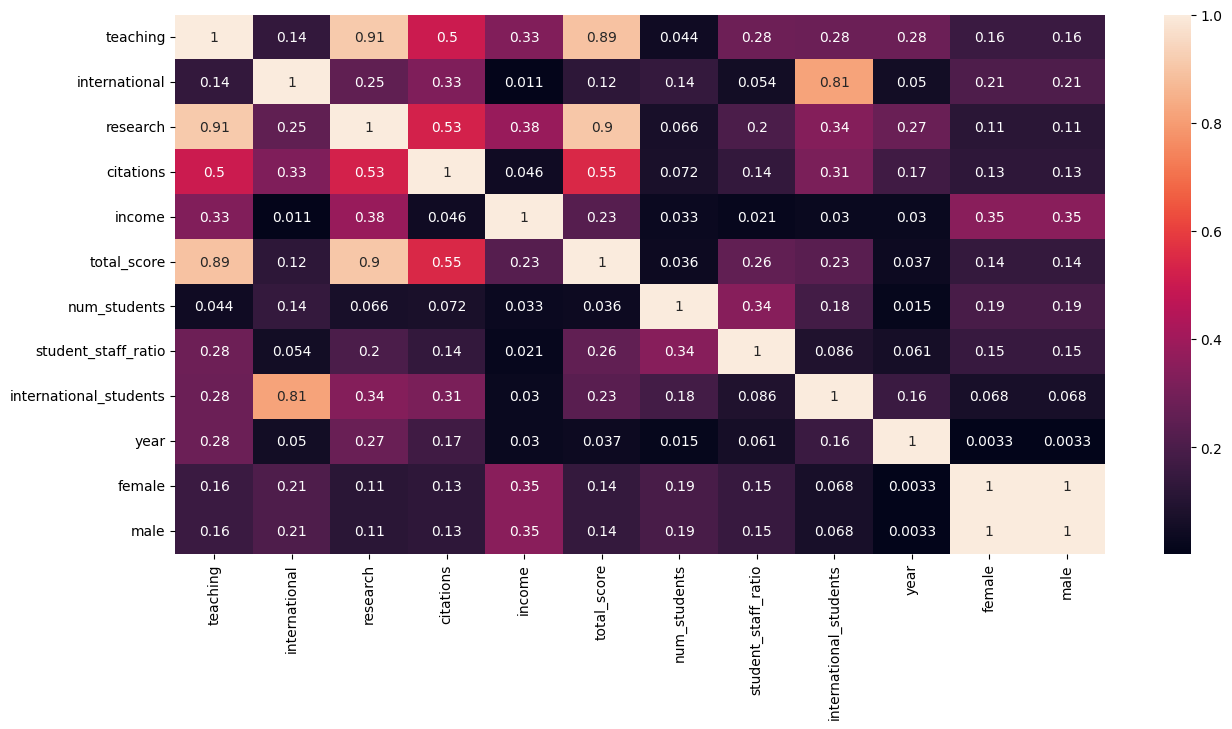

In [13]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr().abs(), annot=True)
plt.show()

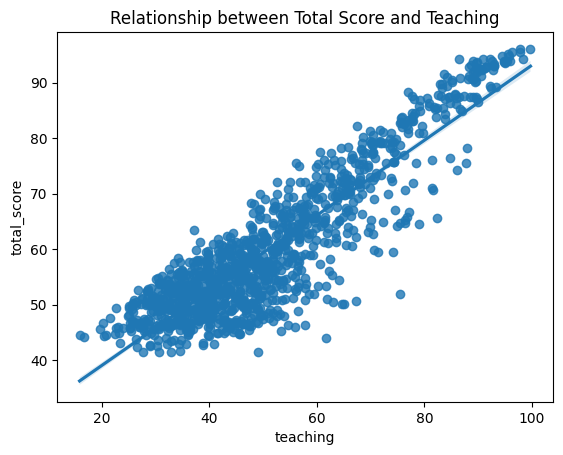

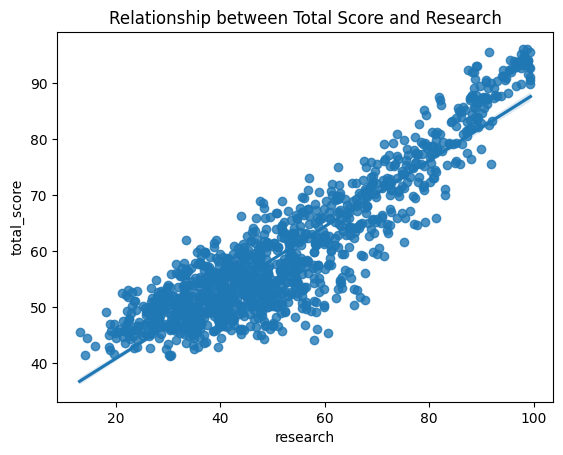

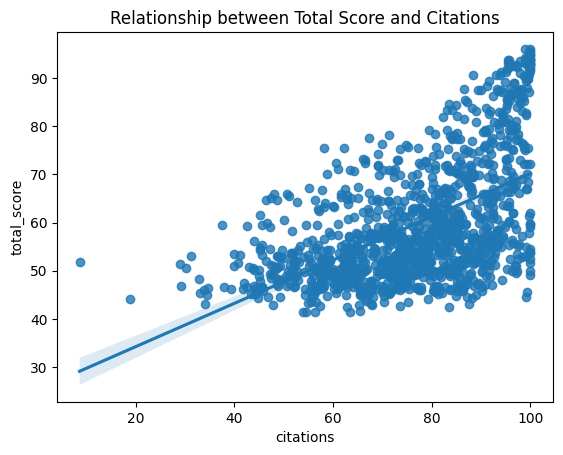

In [14]:
y = df.total_score
x = df[['teaching', 'research', 'citations']]

for i, col in enumerate(x.columns):
  sns.regplot(x=x[col], y=y)
  plt.title(f'Relationship between Total Score and {col.title()}')
  plt.show()

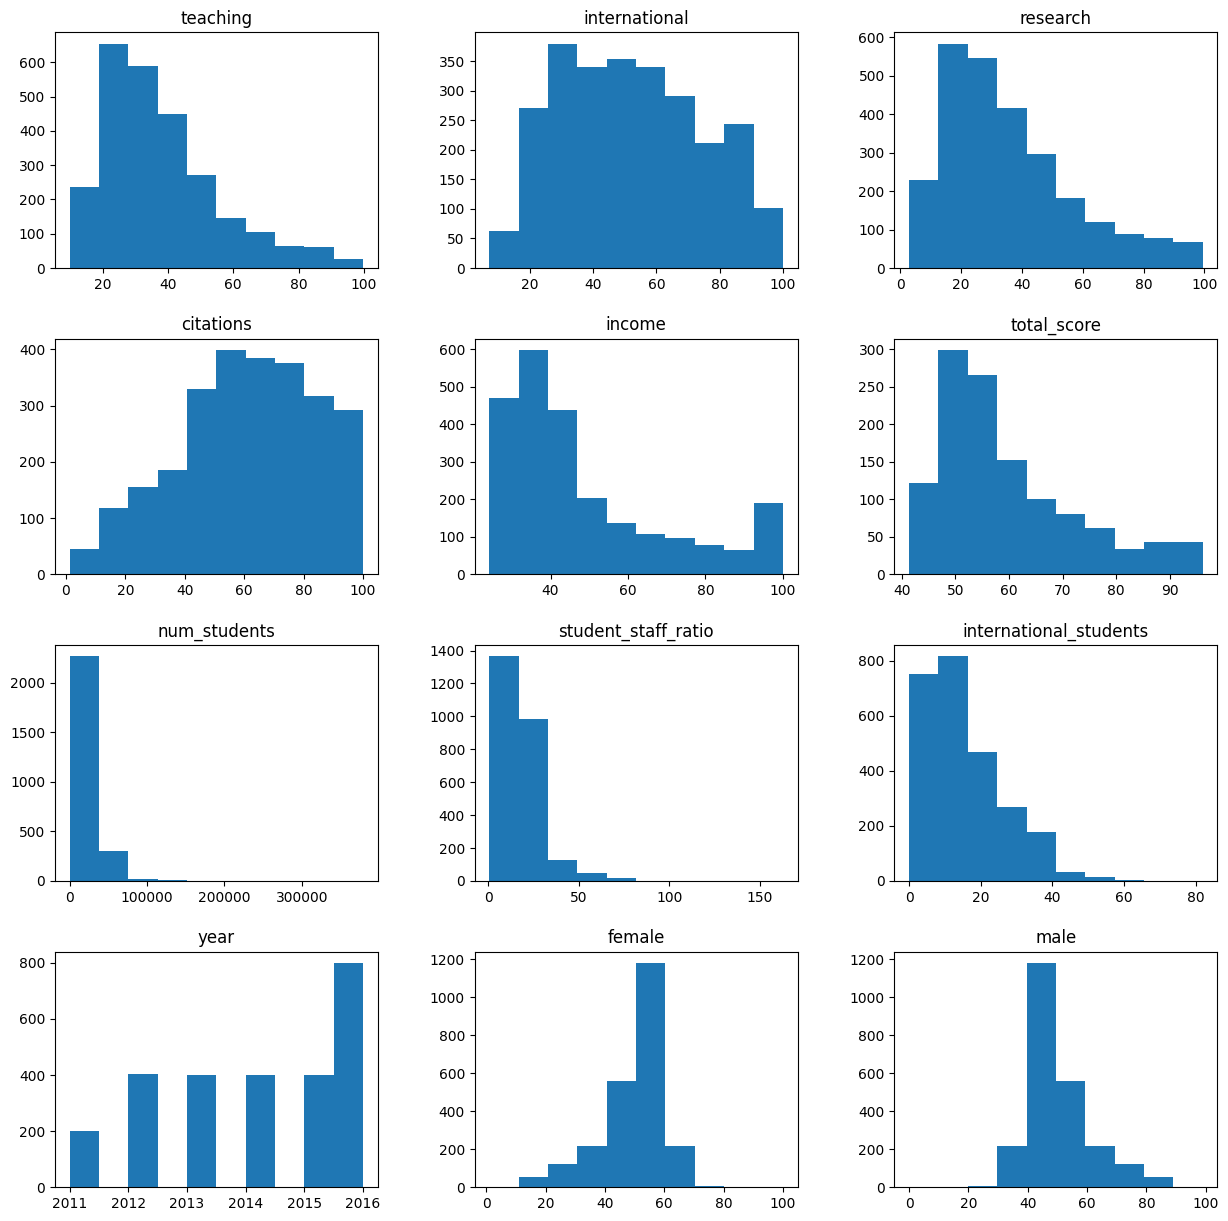

In [15]:
df.hist(figsize=(15, 15), grid=False)
plt.show()

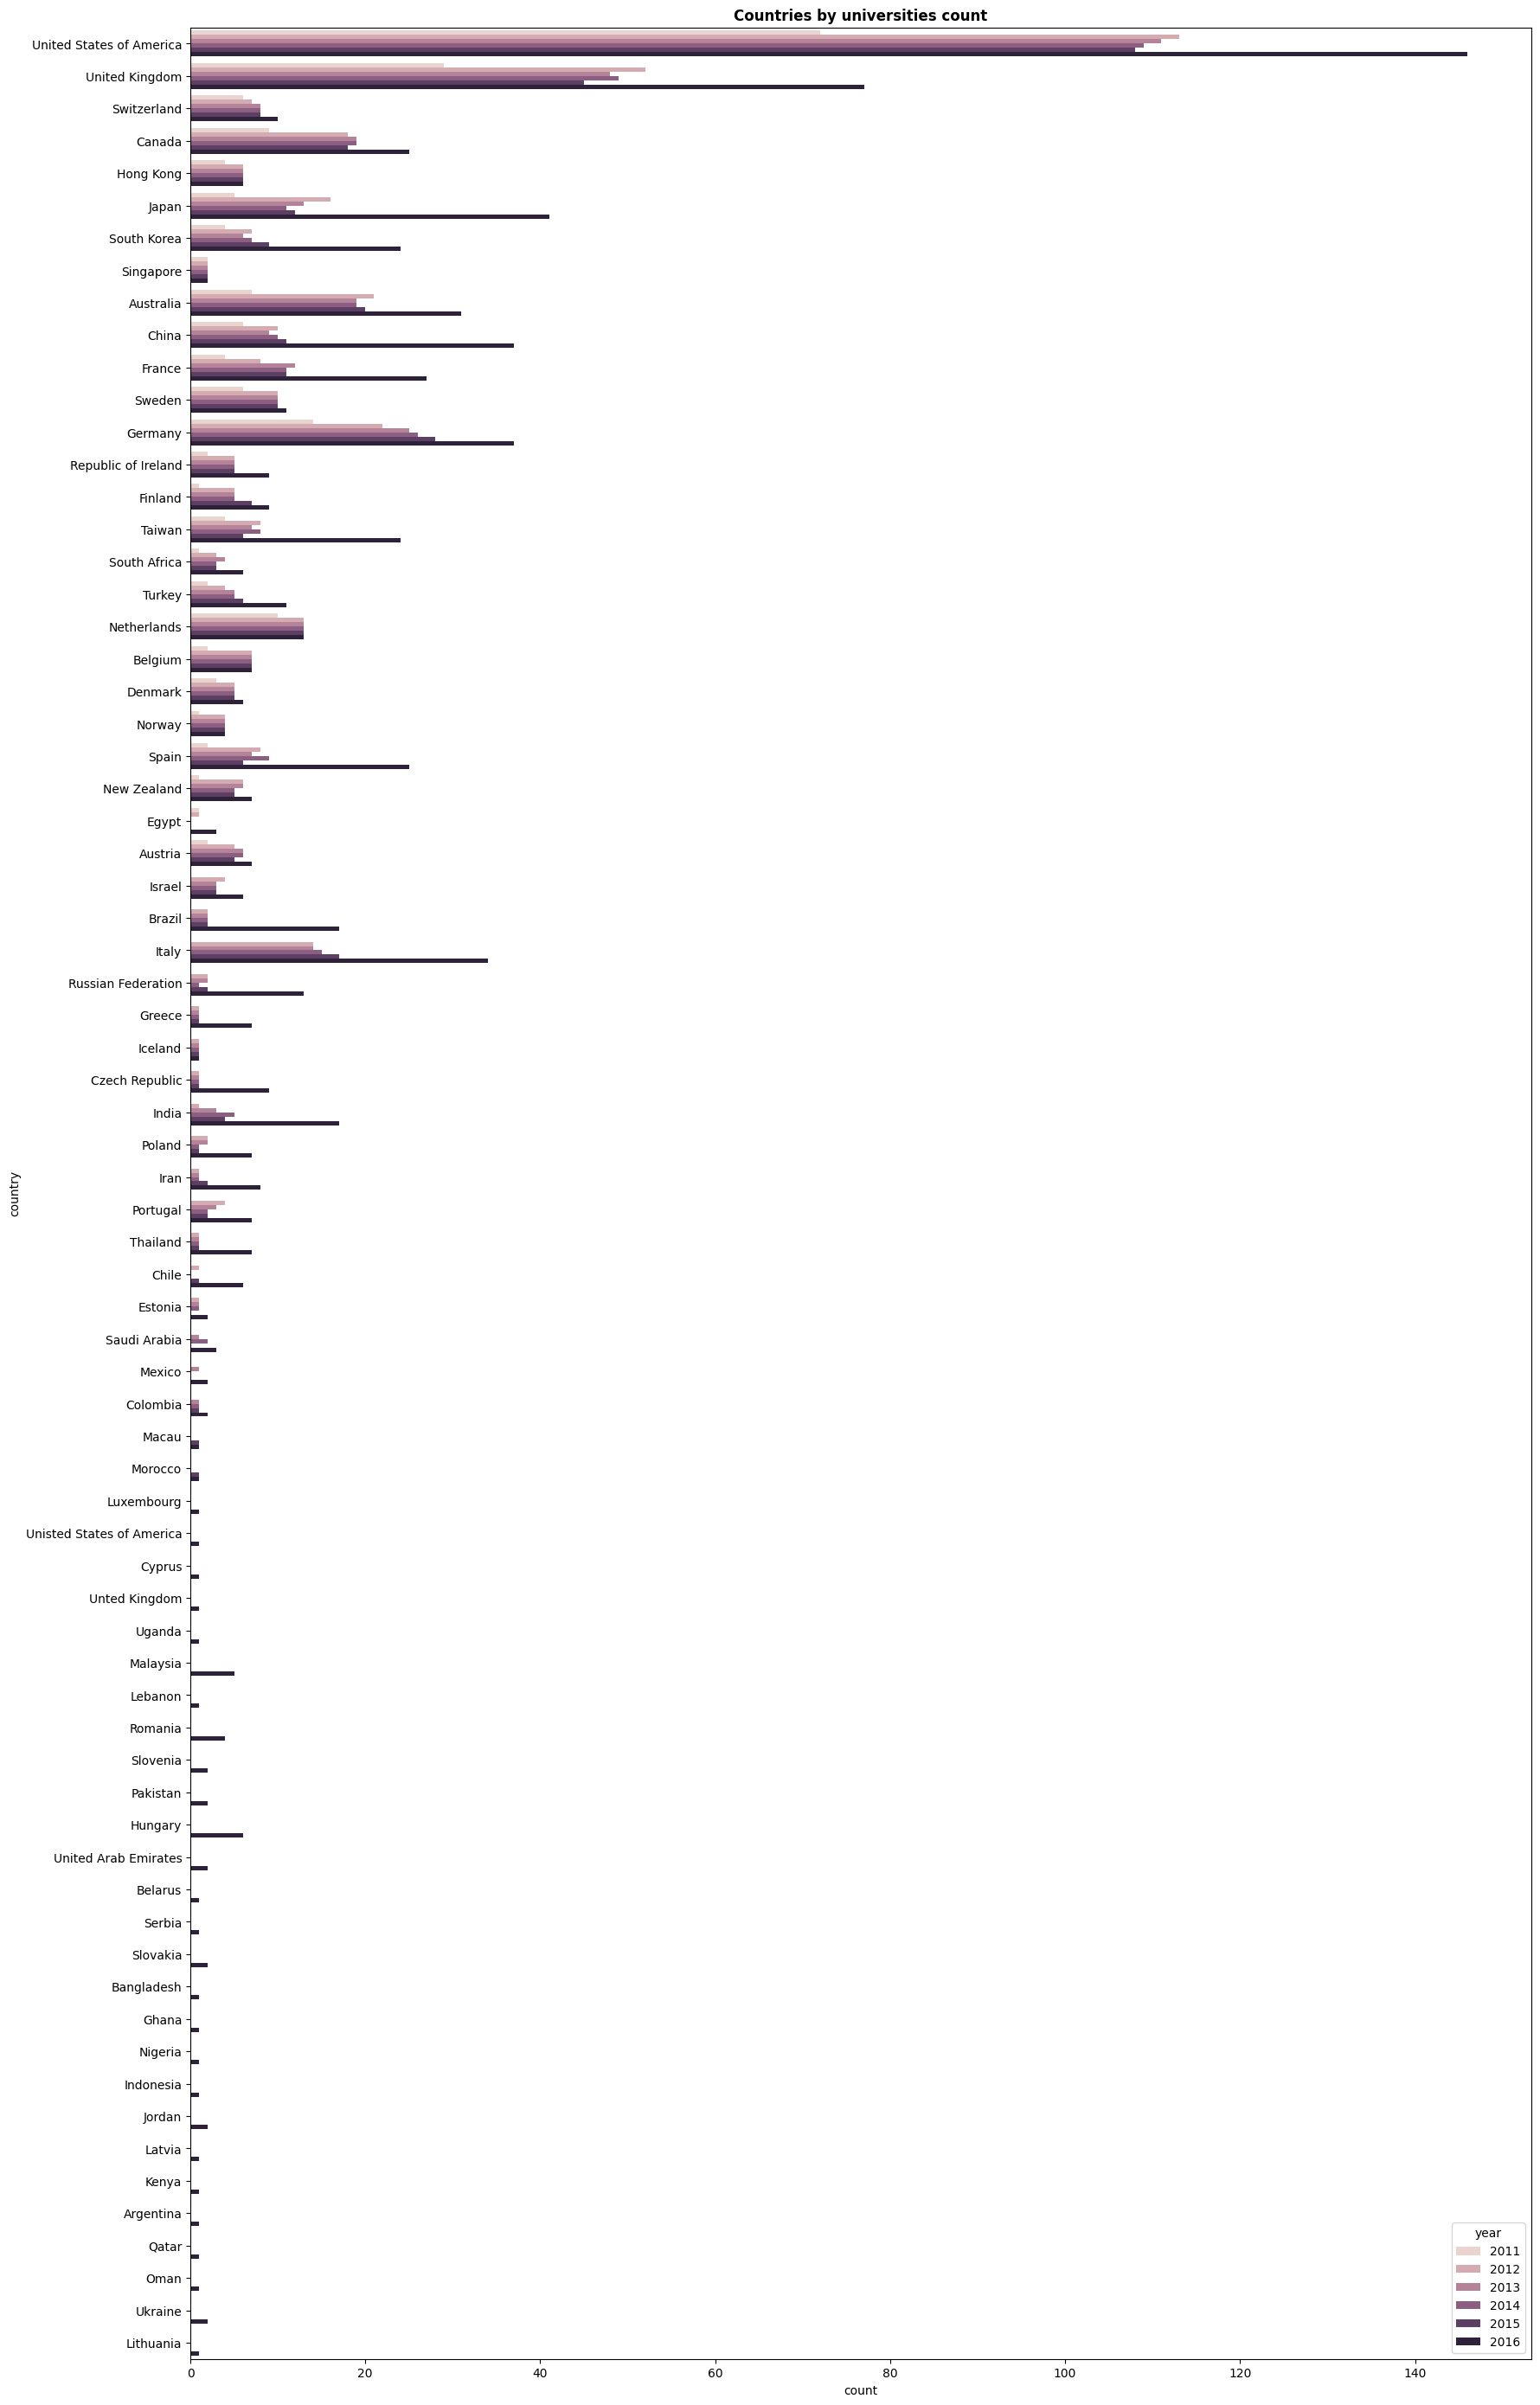

In [16]:
plt.subplots(figsize=(20, 35))
sns.countplot(df, y='country', hue='year')
plt.title('Countries by universities count', fontsize=12, fontweight='bold')
plt.show()

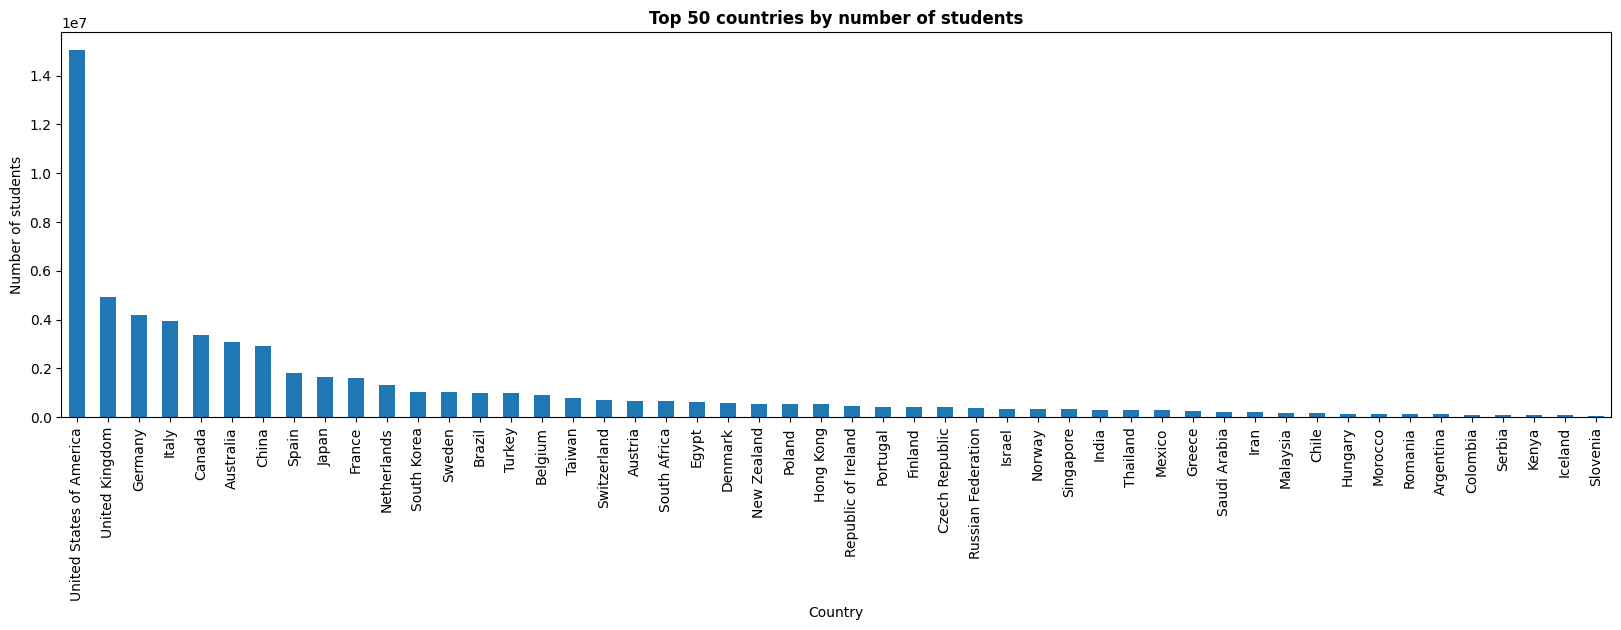

In [17]:
df.groupby('country').num_students.sum().sort_values(ascending=False).head(50).plot(kind='bar', figsize=(20,5))
plt.title('Top 50 countries by number of students', fontsize=12, fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Number of students')
plt.show()

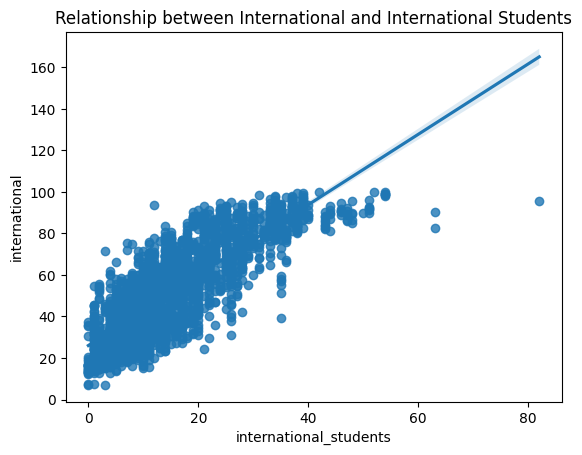

In [18]:
sns.regplot(x=df.international_students, y=df.international)
plt.title(f'Relationship between International and International Students')
plt.show()

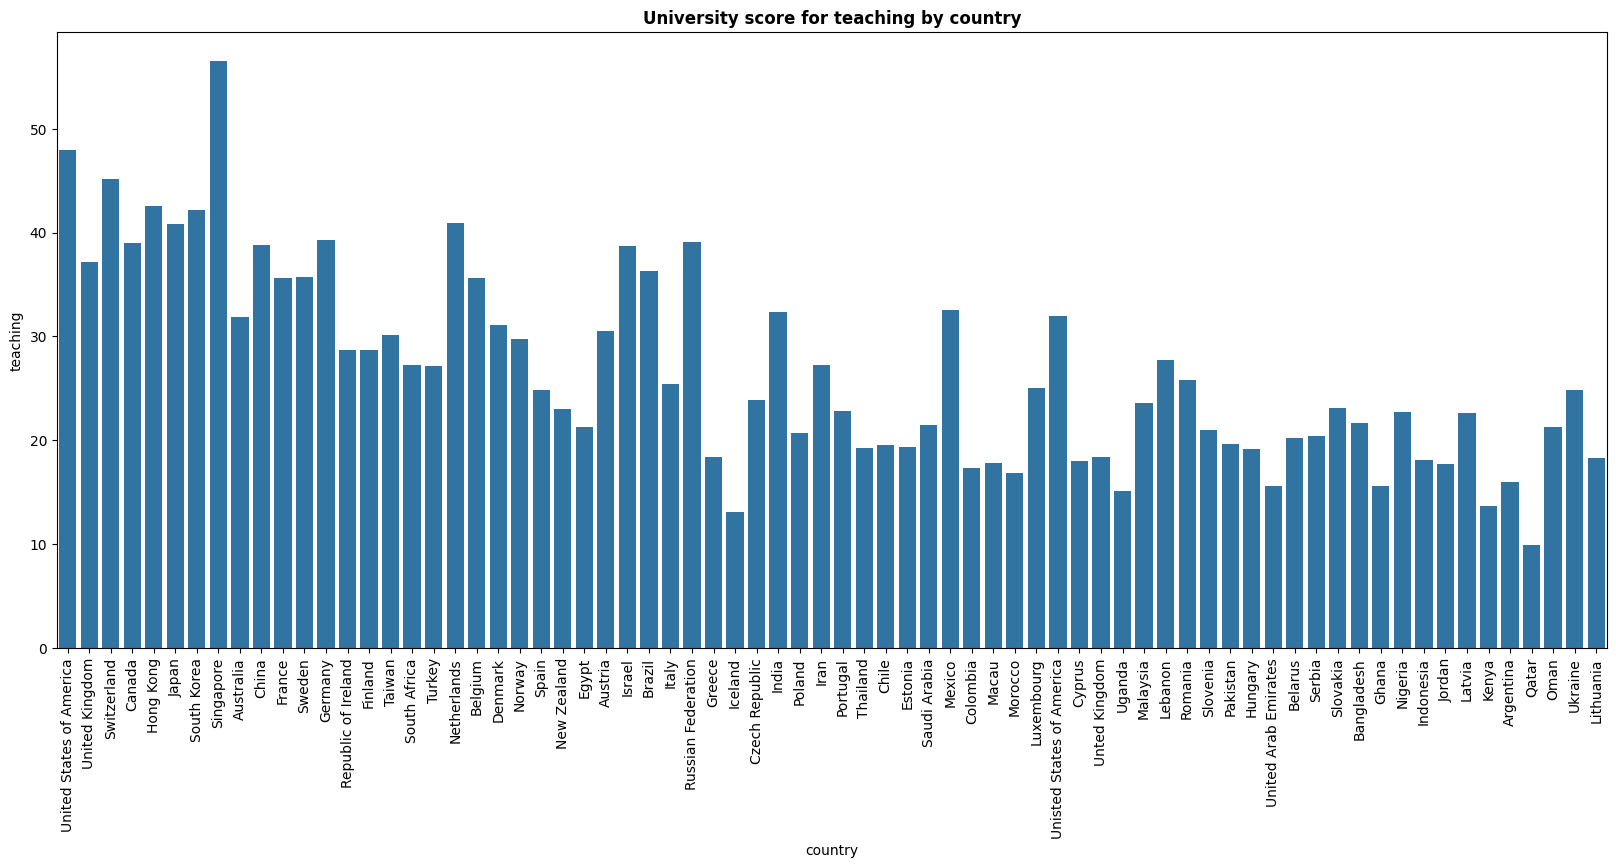

In [19]:
plt.subplots(figsize=(20, 8))
sns.barplot(x="country", y="teaching", data=df, errorbar=None)
plt.title('University score for teaching by country', fontsize=12, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

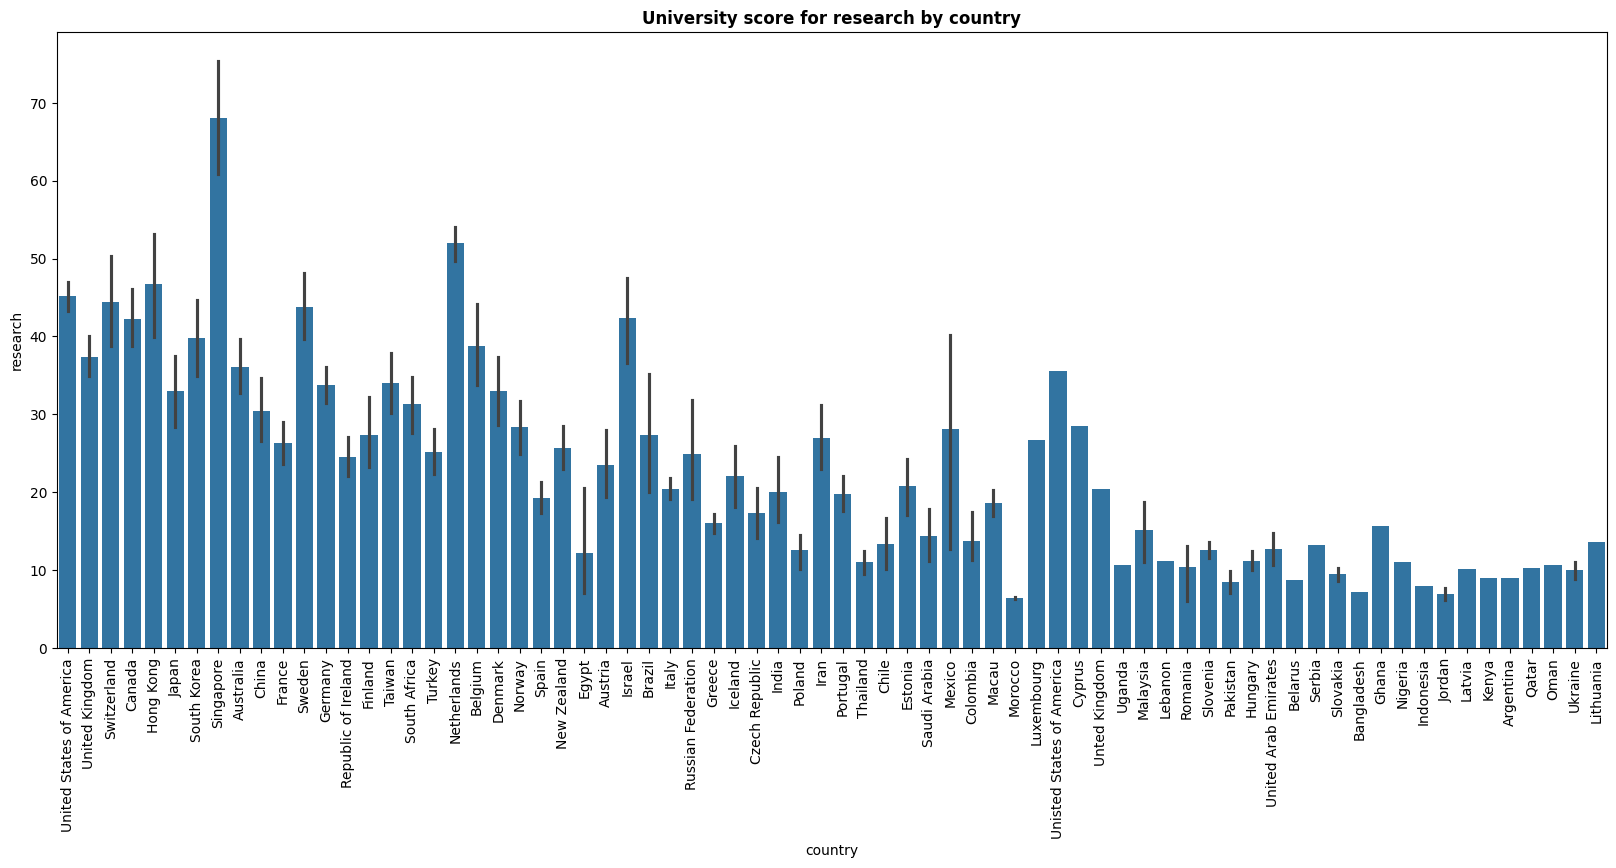

In [20]:
plt.subplots(figsize=(20, 8))
sns.barplot(x="country", y="research", data=df)
plt.title('University score for research by country', fontsize=12, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

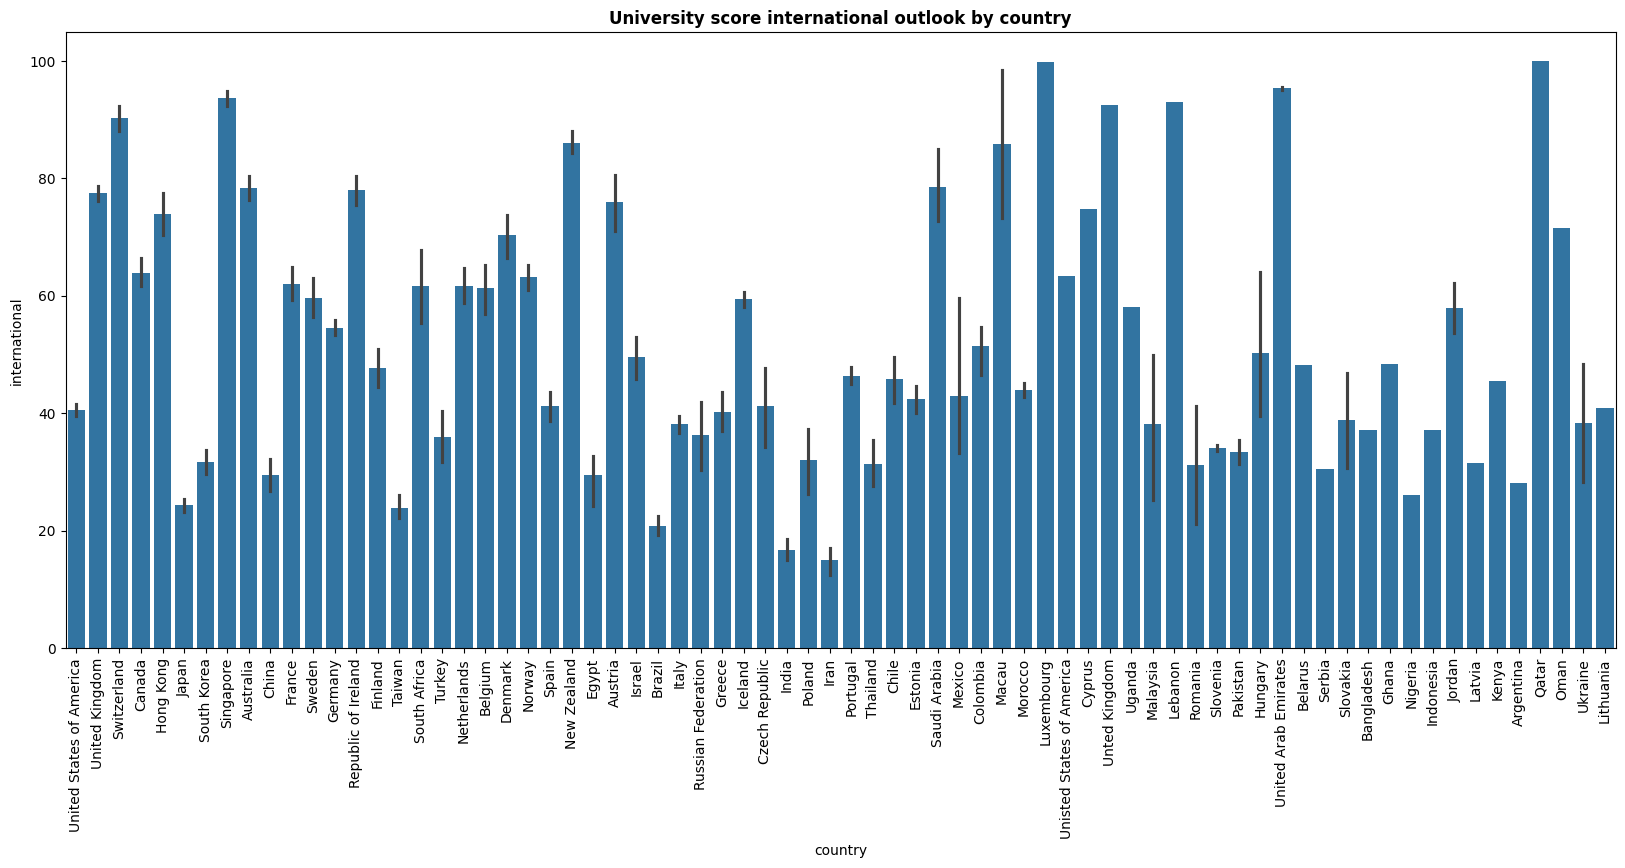

In [21]:
plt.subplots(figsize=(20, 8))
sns.barplot(x="country", y="international", data=df)
plt.title('University score international outlook by country', fontsize=12, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

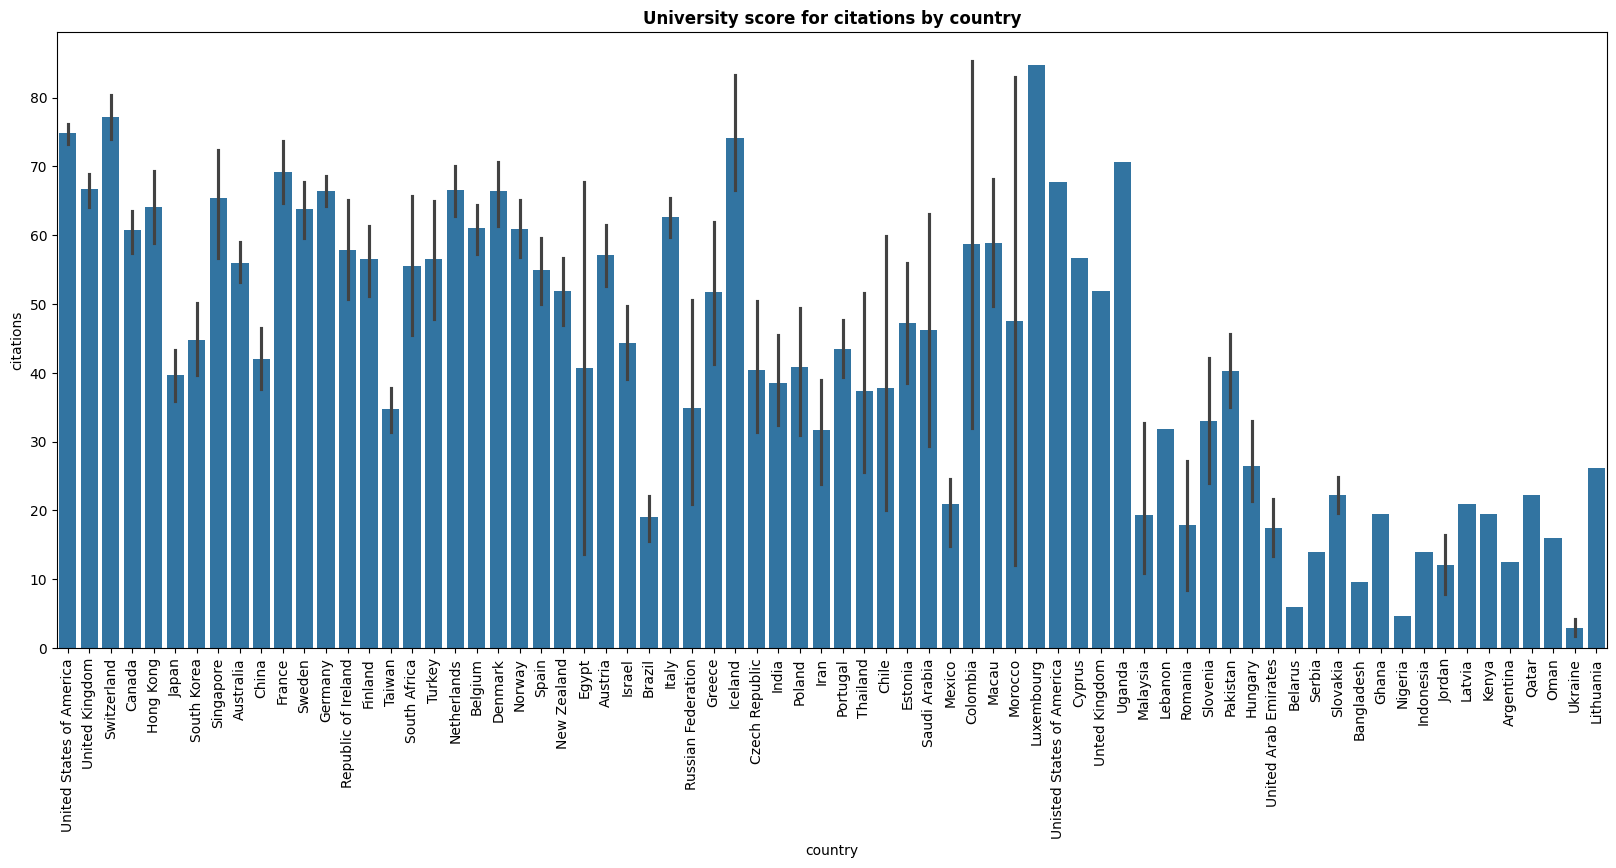

In [22]:
plt.subplots(figsize=(20, 8))
sns.barplot(x="country", y="citations", data=df)
plt.title('University score for citations by country', fontsize=12, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

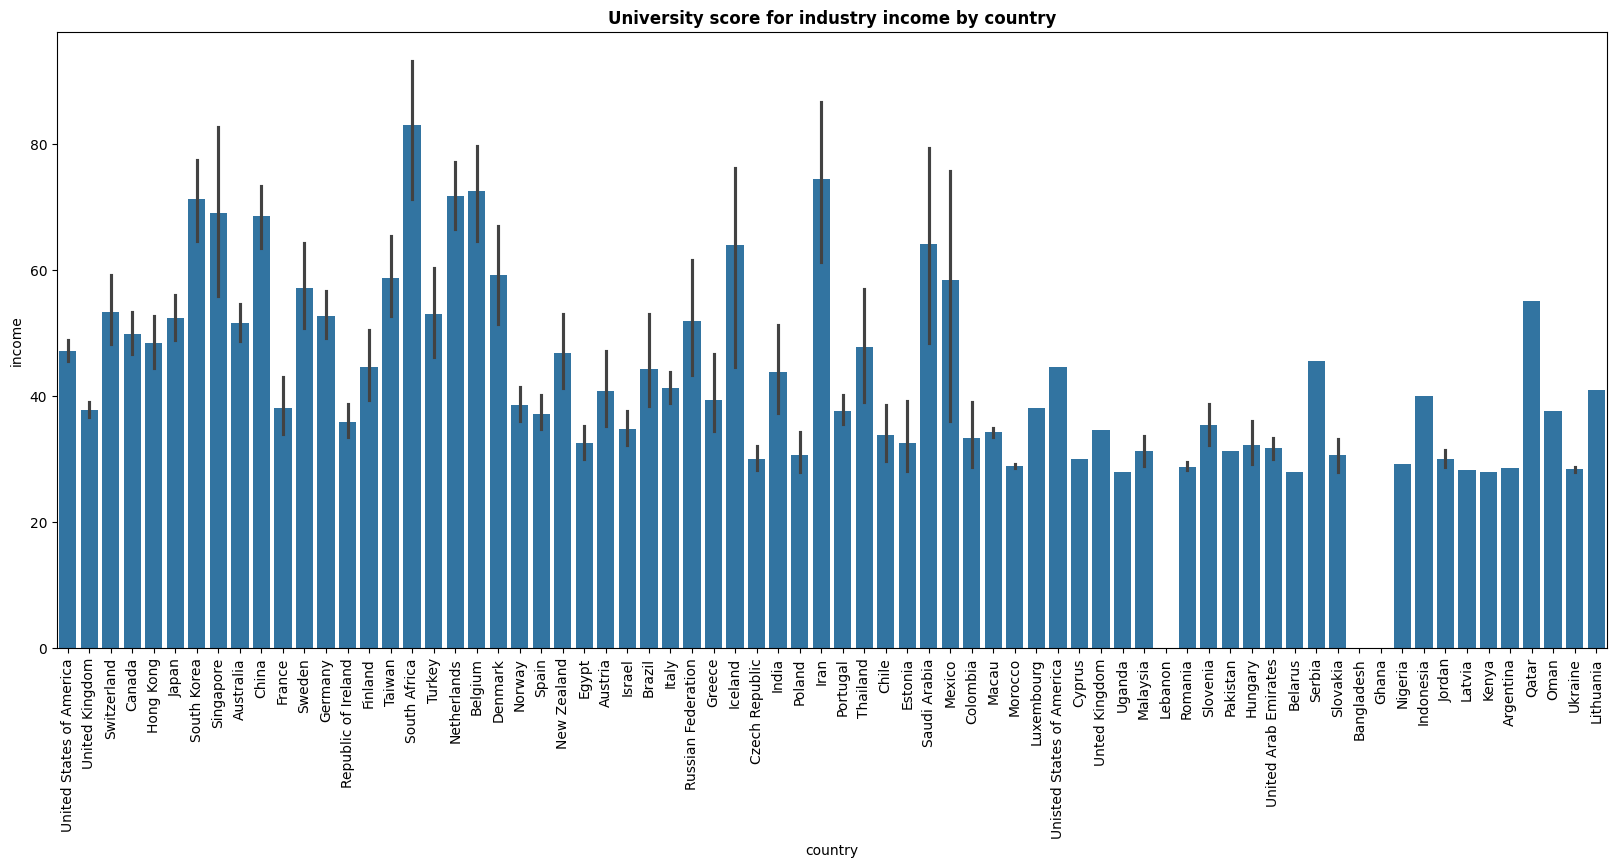

In [23]:
plt.subplots(figsize=(20, 8))
sns.barplot(x="country", y="income", data=df)
plt.title('University score for industry income by country', fontsize=12, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

В данном датасете больше представлено университетов из США и Великобритании.

Существует зависимость между общей оценкой университета и оценками за исследования, преподавания и цитируемость. Чем выше оценка за исследования, преподавания и цитируемость, тем выше общий балл университета.

Чем выше процент инностранных студентов, тем выше оценка университета за международные перспективы.

Лучшие оценки за преподование в университетах из Сингапура, США и Швейцарии, худшие - из Исландии, Кении и Катара.

Лучшие оценки за исследования в университетах из Сингапура, Нидерландов и Гонконга, худшие - из Марокко, Бангладеш и Иордании.

Лучшие оценки за международные перспективы в университетах из Катара, Люксембурга и Арабских Эмиратах, худшие - из Индии, Ирана и Бразилии.

Лучшие оценки за цитируемость в университетах из Люксембурга, Швейцарии и США, худшие - из Беларуси, Украины и Нигерии.

Лучшие оценки за отраслевой доход (передача знаний) в университетах из Южной Африки, Ирана и Бельгии, худшие - из Беларуси, Кении и Уганды.

**Выборки**

In [24]:
# Случайная выборка
sample1 = df.sample(frac=0.25)
print(f'shape sample1: {sample1.shape}')
sample1.describe()

shape sample1: (651, 16)


,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,year,female,male
count,651.000000,648.000000,651.000000,651.000000,594.000000,285.000000,651.000000,634.000000,634.000000,651.000000,589.000000,589.000000
mean,37.369432,50.969290,35.084178,60.046851,48.290067,59.485263,23036.374808,18.044006,15.269716,2014.049155,49.315789,50.684211
std,17.176227,21.897246,20.783281,22.968478,20.495852,12.536549,16761.909491,11.320260,10.708170,1.727794,10.789834,10.789834
min,10.700000,7.700000,6.300000,3.900000,24.200000,41.500000,0.000000,2.100000,0.000000,2011.000000,13.000000,29.000000
25%,24.500000,32.450000,19.200000,45.050000,32.900000,50.300000,12025.500000,11.600000,7.000000,2012.000000,46.000000,44.000000
50%,33.700000,49.050000,29.900000,61.200000,40.300000,56.100000,20152.000000,15.900000,13.000000,2014.000000,52.000000,48.000000
75%,46.400000,68.250000,46.150000,78.100000,58.925000,66.000000,29336.000000,20.300000,21.000000,2016.000000,56.000000,54.000000
max,95.800000,98.600000,98.600000,100.000000,100.000000,94.300000,197102.000000,108.500000,82.000000,2016.000000,71.000000,87.000000


In [25]:
# Механическая выборка
sample2 = df[::3]
print(f'shape sample2: {sample2.shape}')
sample2.describe()

shape sample2: (868, 16)


,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,year,female,male
count,868.000000,868.000000,868.000000,868.000000,801.000000,402.000000,868.000000,850.000000,847.000000,868.000000,781.000000,781.000000
mean,37.524539,52.370737,35.890092,61.169816,48.639825,59.861443,22864.891705,18.106706,15.416765,2014.074885,49.516005,50.483995
std,17.640910,21.997494,21.144892,23.602326,20.814538,12.891724,17635.036716,10.491832,10.630918,1.687232,10.665127,10.665127
min,11.300000,7.700000,3.900000,3.000000,24.200000,41.400000,0.000000,2.100000,0.000000,2011.000000,12.000000,22.000000
25%,24.475000,34.375000,19.700000,45.575000,32.800000,50.300000,12291.250000,12.100000,7.000000,2013.000000,46.000000,44.000000
50%,33.100000,50.700000,30.650000,62.050000,41.000000,56.000000,19662.500000,16.000000,13.000000,2014.000000,52.000000,48.000000
75%,45.625000,68.700000,47.550000,80.625000,58.700000,66.075000,28389.250000,21.475000,21.000000,2016.000000,56.000000,54.000000
max,99.700000,99.800000,99.100000,100.000000,100.000000,96.100000,231941.000000,108.500000,54.000000,2016.000000,78.000000,88.000000


In [26]:
# Выборка по годам
sample3 = df.groupby('year', group_keys=False).apply(lambda x: x.sample(frac=0.25))
print(f'shape sample3: {sample3.shape}')
sample3.describe()

shape sample3: (650, 16)


,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,year,female,male
count,650.000000,648.000000,650.000000,650.000000,613.000000,299.000000,650.000000,644.000000,642.000000,650.000000,619.000000,619.000000
mean,37.217385,52.122068,34.479231,61.797538,47.980261,58.574247,23264.646154,18.451708,15.535826,2014.076923,49.455574,50.544426
std,16.919295,22.123662,20.367576,22.319450,21.257618,11.765033,15932.455004,11.291871,10.450662,1.686598,10.984656,10.984656
min,9.900000,7.100000,5.400000,1.700000,24.200000,41.400000,0.000000,0.600000,0.000000,2011.000000,1.000000,22.000000
25%,24.600000,33.325000,19.125000,47.275000,32.500000,50.100000,12551.000000,11.900000,8.000000,2013.000000,46.000000,44.000000
50%,33.650000,51.300000,29.150000,64.250000,39.500000,55.200000,20541.000000,15.900000,14.000000,2014.000000,52.000000,48.000000
75%,45.300000,69.725000,45.125000,79.150000,56.600000,63.550000,30016.500000,21.900000,21.000000,2016.000000,56.000000,54.000000
max,94.800000,100.000000,99.400000,100.000000,100.000000,93.900000,231941.000000,72.500000,54.000000,2016.000000,78.000000,99.000000


In [27]:
# Выборка по странам
sample4 = df.groupby('country', group_keys=False).apply(lambda x: x.sample(frac=0.25))
print(f'shape sample4: {sample4.shape}')
sample4.describe()

shape sample4: (641, 16)


,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,year,female,male
count,641.000000,639.000000,641.000000,641.000000,593.000000,307.000000,641.000000,627.000000,626.000000,641.000000,578.000000,578.000000
mean,38.600624,52.141784,36.748986,61.377379,49.953963,59.897394,23487.747270,18.218979,15.434505,2014.132605,49.311419,50.688581
std,17.763772,22.187803,21.365460,23.079142,21.212865,12.874164,16125.145922,10.334141,10.583747,1.702814,10.938139,10.938139
min,11.400000,7.100000,2.900000,1.200000,24.200000,41.500000,0.000000,1.100000,0.000000,2011.000000,13.000000,0.000000
25%,25.700000,33.500000,20.600000,45.500000,33.600000,50.300000,12938.000000,11.900000,7.000000,2013.000000,45.250000,44.000000
50%,34.400000,51.500000,32.000000,62.900000,42.300000,56.100000,20951.000000,15.900000,13.000000,2014.000000,52.000000,48.000000
75%,48.100000,67.750000,48.300000,79.400000,61.300000,65.800000,29787.000000,22.150000,21.000000,2016.000000,56.000000,54.750000
max,98.300000,100.000000,99.400000,100.000000,100.000000,96.000000,137378.000000,72.500000,63.000000,2016.000000,100.000000,87.000000


Все выборки имеют схожие рассчитанные показатели. В основном выборки отличаются от генеральной совокупности на +- 1-2 пункта.